### Absolute vs. Relative Frequency

### Step 1. Make the necessary import

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [66]:
pokemon = pd.read_csv('./pokemon.csv')
pokemon.shape

(807, 14)

### data wrangling, and plot a horizontal bar chart.

#### Step 2. Data wrangling to reshape the pokemon dataframe

In [67]:
# melting
pkmn_types = pokemon.melt(id_vars=['species', 'generation_id'], 
                          value_vars=['type_1', 'type_2'], 
                          var_name='type_level', 
                          value_name='type').dropna()
pkmn_types.head()

,species,generation_id,type_level,type
0,bulbasaur,1,type_1,grass
1,ivysaur,1,type_1,grass
2,venusaur,1,type_1,grass
3,charmander,1,type_1,fire
4,charmeleon,1,type_1,fire


#### Step 3. Find the frequency of unique values in the type column

In [68]:
type_counts = pkmn_types['type'].value_counts()
type_order = type_counts.index
# print('type_counts:\n', type_counts)
# print('type_order:', type_order)

#### Step 4. Plot the horizontal bar charts

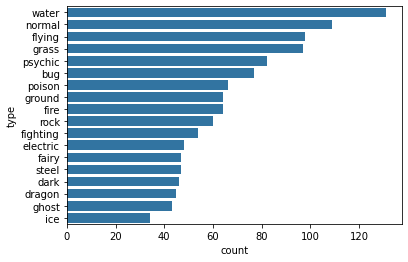

In [69]:
base_color = sb.color_palette()[0]
sb.countplot(data=pkmn_types, y='type', color=base_color, order=type_order);

### Plot a bar chart having the proportions, instead of the actual count, on one of the axes.

#### Step 1. Find the maximum proportion of bar

In [70]:
n_pokemon = pokemon.shape[0]
max_type_count = type_counts[0]
max_prop = max_type_count / n_pokemon
max_prop

0.1623296158612144

#### Step 2. Create an array of evenly spaced proportioned values & Create a list of String values that can be used as tick labels.

In [71]:
tick_props = np.arange(0, max_prop, 0.02)
tick_names = [f'{v:0.2f}' for v in tick_props]
tick_names

['0.00', '0.02', '0.04', '0.06', '0.08', '0.10', '0.12', '0.14', '0.16']

#### Step 3. Plot the bar chart, with new x-tick labels

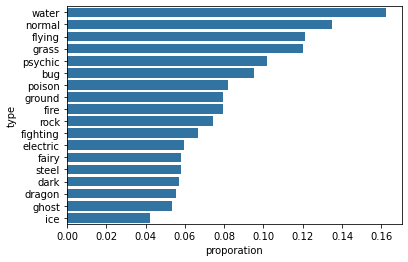

In [72]:
sb.countplot(data=pkmn_types, y='type', color=base_color, order=type_order);
plt.xticks(tick_props * n_pokemon, tick_names);
plt.xlabel('proporation');

### Print the text (proportion) on the bars of a horizontal plot.

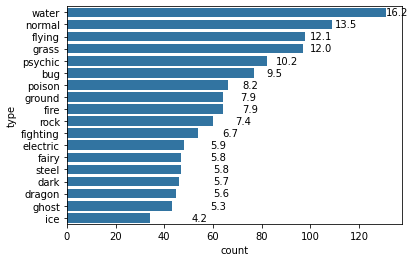

In [106]:
sb.countplot(data=pkmn_types, y='type', order=type_order, color=base_color);

for i in range(type_counts.shape[0]):
    count = type_counts[i]
    pct = (100 * count) / n_pokemon
    pct_string = f'{pct:0.1f}'
    plt.text(count+i, i, pct_string, va='center')

### Print the text (proportion) below the bars of a Vertical plot.

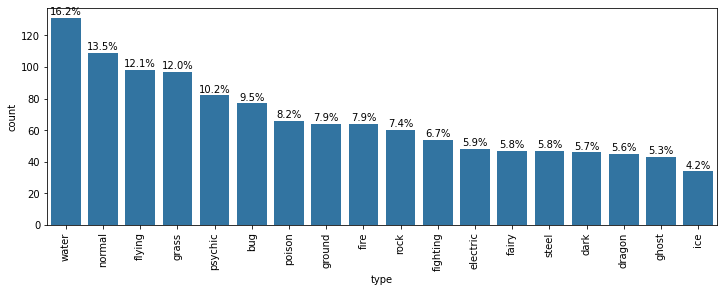

In [123]:
from matplotlib import rcParams

# Considering the same chart from the Example 1 above, print the text (proportion) BELOW the bars
base_color = sb.color_palette()[0]
sb.countplot(data=pkmn_types, x='type', color=base_color, order=type_order);


# Recalculating the type_counts just to have clarity.
type_counts = pkmn_types['type'].value_counts()

# get the current tick locations and labels
locs, labels = plt.xticks(rotation=90) 

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = type_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_pokemon)

    # print the annotation just below the top of the bar
    plt.text(loc, count+2, pct_string, ha = 'center', color = 'black')

# Specify the figure size in inches, for both X, and Y axes
rcParams['figure.figsize'] = 12,4